# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from functools import reduce
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete=pd.merge(study_results,mouse_metadata,how='left',on=['Mouse ID'])

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count=mouse_data_complete['Mouse ID'].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=mouse_data_complete[mouse_data_complete.duplicated(['Mouse ID','Timepoint'],keep=False)]


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice.head(50)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_clean=mouse_data_complete[mouse_data_complete['Mouse ID'] != 'g989']


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_data_clean['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# get each statistic by groupby function

#get mean and median individually and merge
means=mouse_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medians=mouse_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
merge1=pd.merge(means,medians,on=['Drug Regimen'], how='outer',suffixes=(' mean',' median'))

#get standard deviation and merge again
mouse_stdev=pd.DataFrame(mouse_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std())
merge2=pd.merge(merge1,mouse_stdev,on=['Drug Regimen'], how='outer', suffixes=(None, ' std dev'))

#get variance with var vunction and merge
mouse_var=pd.DataFrame(mouse_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var())
merge3=pd.merge(merge2,mouse_var,on=['Drug Regimen'],how='outer',suffixes=(None,' variance'))

#get standard error with sem function and merge again
mouse_sem=pd.DataFrame(mouse_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem())
mouse_data_merged=pd.merge(merge3,mouse_sem,on=['Drug Regimen'],how='outer',suffixes=(None, ' std error'))

In [8]:
#clean up column names
mouse_summary=mouse_data_merged.rename(columns={'Tumor Volume (mm3) mean':'Mean Tumor Volume'
                                               ,'Tumor Volume (mm3) median':'Median Tumor Volume'
                                               ,'Tumor Volume (mm3)':'Tumor Volume Std. Dev.'
                                               ,'Tumor Volume (mm3) variance':'Tumor Volume Variance'
                                               ,'Tumor Volume (mm3) std error':'Tumor Volume Std. Err.'})
mouse_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Std. Dev.,Tumor Volume Variance,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

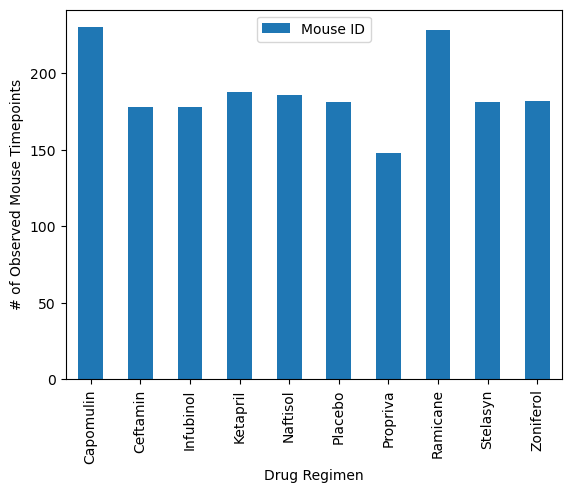

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
rows_per_regimen=mouse_data_clean.groupby('Drug Regimen')['Mouse ID'].count()
rows_per_regimen=pd.DataFrame(rows_per_regimen)
rows_per_regimen.plot(kind='bar', ylabel='# of Observed Mouse Timepoints')
plt.show()

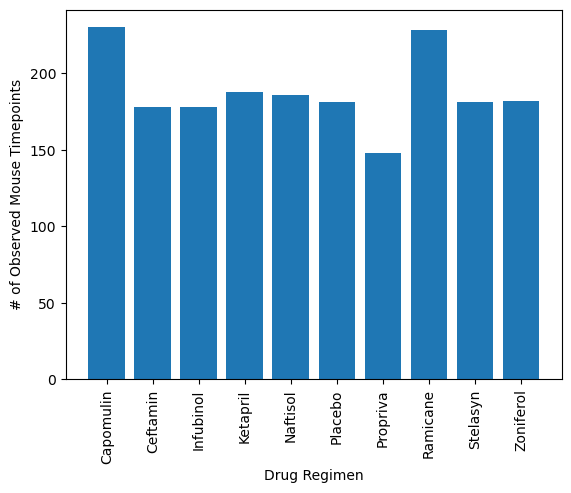

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis=np.arange(len(rows_per_regimen))
y_axis=rows_per_regimen['Mouse ID']
plt.bar(x_axis,y_axis,align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
x_datalabels=rows_per_regimen.index
x_ticks=[value for value in x_axis]
plt.xticks(x_ticks,x_datalabels,rotation=90)
plt.show()

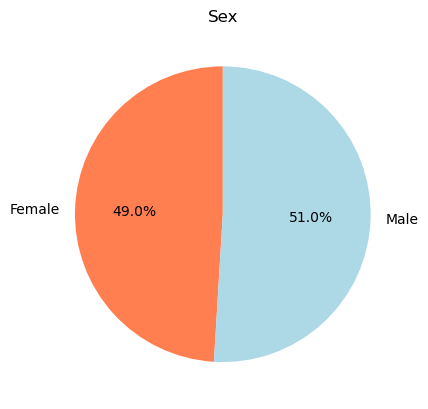

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex=mouse_data_clean.groupby('Sex')['Mouse ID'].count()

mouse_sex.plot(kind='pie',y=mouse_sex,ylabel='',autopct="%1.1f%%",colors=['coral','lightblue'],title='Sex',startangle=90)
plt.show()

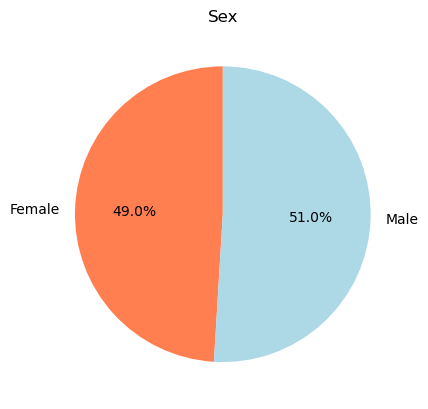

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


labels=mouse_sex.index.tolist()

values=mouse_sex.tolist()

colors=['coral','lightblue']

plt.pie(values,labels=labels,colors=colors,autopct="%1.1f%%",startangle=90)
plt.title('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#create set with only the desired drug regimens

maxtime_mouse=pd.DataFrame(mouse_data_clean.groupby('Mouse ID')['Timepoint'].max())
maxtime_mouse.reset_index()

#merge max time with clean data frame--use inner merge (only keeps the ones that match) merge on mouse id and timepoint




,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles=mouse_data_clean['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
iqr=upperq-lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

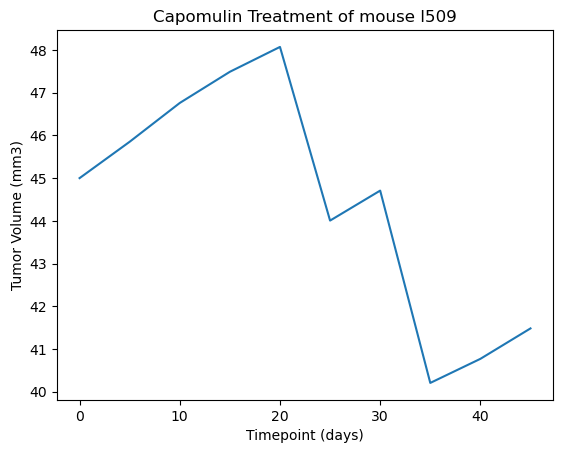

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#create a cut of the clean dataframe that is all the timepoints of a single mouse (I509)
single_mouse=mouse_data_clean[(mouse_data_clean['Mouse ID']=='l509')]
plt.plot(single_mouse['Timepoint'],single_mouse['Tumor Volume (mm3)'])
plt.title('Capomulin Treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#create a cut of the clean dataframe that is only the Capomulin regimen
Capomulin_df=mouse_data_clean[(mouse_data_clean['Drug Regimen']=='Capomulin')]

#calculate the average tumor volume per mouse for this cut of the data
Capo_avg=pd.DataFrame(Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())
Capo_avg.reset_index()
#create a dataframe that is weight vs. avg tumor volume
#use .plot to create a scatter plot of the weight vs. avg tumor volume  df

,Mouse ID,Tumor Volume (mm3)
0,b128,41.963636
1,b742,40.083699
2,f966,36.505973
3,g288,41.990097
4,g316,44.613344
5,i557,44.805810
6,i738,39.141053
7,j119,44.465236
8,j246,43.216925
9,l509,44.434474


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#using scatter plot from above and st.pearsonr to calculation correlation coefficient

#use linregress to find the terms of the regression line equation
#re-do scatter plot and add regression line